# Coursera ML Exercise 2

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas
import os

## 1 Logistic Regression

### 1.1 Visualizing the data

In [38]:
data_admits = pandas.read_table("ex2data1.txt", 
                                sep=',', header=None, 
                                names=['exam1','exam2', 'admit'])

data_admits.head()

,exam1,exam2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


<IPython.core.display.Javascript object>


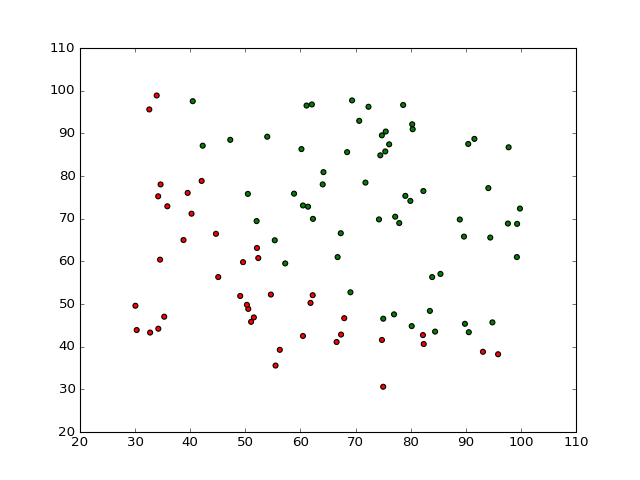

In [48]:
admits_features = np.vstack([np.ones(len(data_admits)), 
                            np.array(data_admits.exam1), 
                            np.array(data_admits.exam2)])
admits_labels = np.array(data_admits.admit)

colors = ['red', 'green']

admits_scatter = plt.figure()
admits_scatter_ax = admits_scatter.add_subplot(111)
admits_scatter_ax.scatter(data_admits.exam1, data_admits.exam2,
                          c=data_admits.admit, 
                          cmap=matplotlib.colors.ListedColormap(colors))

## 1.2 Implementation

### 1.2.1 Sigmoid Function

Remember, logistic regression hypothesis defined as: 
    $$ h_\theta(x) = g(\theta^Tx) $$
where function $g$ is sigmoid function:
    $$ g(z) = \frac{1}{1 + e^{-z}} $$
So really hypothesis function is:
    $$ \large h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}} $$

In [8]:
def sigmoid(z):
    """Computes sigmoid function for a given input z. Works 
    on scalars or vectors thanks to numpy functions"""
    return 1 / (1 + np.exp(-z))

### 1.2.2 Cost function & gradient

Cost function given as:

$$ \large
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \big[ -y^{(i)}\log(h_\theta(x^{(i)} )) - (1 - y^{(i)})\log(1 - h_\theta(x^{(i)})) \big]
$$

where labels $ y^{(i)} $ are either $ 0 $ or $1$



In [23]:
def computeCost(theta, X, y):
    """Computes logistic regression cost function for given data X 
    and y and parameters theta, with a logistic hypothesis function"""
    m = len(y)
    h_theta = sigmoid(np.dot(theta.T, X))
    
    return (1/m) * np.sum(-y * np.log(h_theta) - (1 - y) * 
                         np.log(1 - h_theta))
    

In [24]:
admits_model = np.zeros(np.shape(admits_features)[0])

computeCost(admits_model, admits_features, admits_labels)

0.69314718055994529

Gradient of the cost function given as:

$$ \large \frac{\partial J(\theta)}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)} ) x_{j}^{(i)}
$$

In [27]:
def gradientStep(theta, X, y):
    """Returns the gradient step for logistic regression cost 
    function"""
    m = len(y)
    h_theta = sigmoid(np.dot(theta.T, X))
    
    step_vector = np.zeros_like(theta)
    for j in range(len(step_vector)):
        step_vector[j] = 1/m * np.sum((h_theta - y) * X[j])
    
    return step_vector
    

### 1.2.3 Learning parameters

Using `scipy.optimize.fmin_tnc` instead of Octave's `fminunc`

In [30]:
import scipy.optimize as opt

theta = np.zeros(admits_features.shape[0])

result = opt.fmin_tnc(func = computeCost, x0 = theta, 
                     fprime = gradientStep, 
                     args = (admits_features, admits_labels))
result # tuple, first element is the optimal value of theta

(array([-25.16131868,   0.20623159,   0.20147149]), 36, 0)

In [32]:
theta = result[0]
computeCost(theta, admits_features, admits_labels)

0.20349770158947436

Plotting decision boundary: The line at which you're "50-50" (i.e. where logistic regression classifier outputs 0.5). Solving the hypothesis function above:

$$ h_\theta(x) = 0.5 $$
$$ \theta^Tx = 0$$

$\theta$ is a three-element vector of parameters for each feature value. There's a weight for a dummy feature (the $-25.161...$), the original value of that feature for all training examples is 1. 

So solving

$$ \theta^Tx = 0 $$

is really solving

$$ -25.161 + 0.206 \times ex1 + 0.201 \times ex2 = 0$$

So we get 

$$ ex2 = \frac{25.161 - 0.206 \times ex1}{0.201} $$

a linear function that we can plot along with our data.

In [66]:
line_x = np.linspace(min(data_admits.exam1), max(data_admits.exam2))
line_y = np.apply_along_axis(
                        lambda x: (-theta[0] - theta[1] * x)/theta[2],
                        0, line_x)


<IPython.core.display.Javascript object>


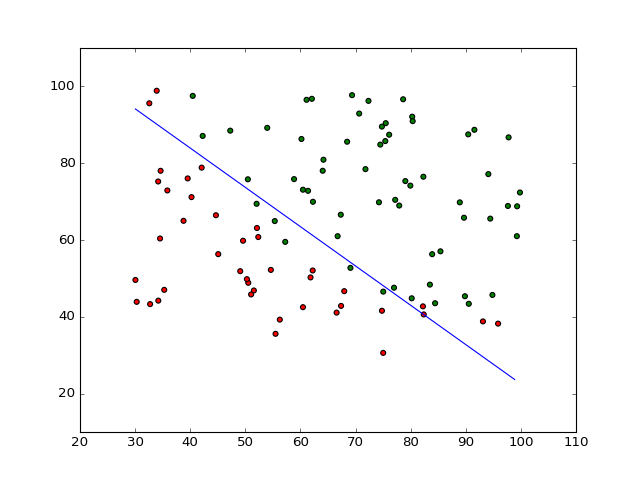

In [67]:
decision_boundary = plt.figure()
decision_boundary_ax = decision_boundary.add_subplot(111)
decision_boundary_ax.plot(line_x, line_y)

colors = ['red', 'green']

decision_boundary_ax.scatter(admits_features[1], admits_features[2],
                          c=admits_labels , 
                          cmap=matplotlib.colors.ListedColormap(colors))

### 1.2.4 Evaluating logistic regression

In [80]:
def predictProb(x_vec, theta):
    """Given a feature vector, return the probability that it has 
    label 1"""
    return sigmoid(np.dot(theta.T, x_vec))

def predictLabel(x_vec, theta):
    """Given a feature vector, returns label 1 or 0"""
    return int(predictProb(theta, x_vec) >= 0.5)

In [89]:
admits_labels_predicted =  np.apply_along_axis(predictLabel, 0, 
                                               admits_features, theta)

### Compute accuracy of classifier ###

np.sum(np.equal(admits_labels_predicted, admits_labels)) / len(
    admits_labels_predicted)

0.89000000000000001

# 2 Regularized logistic regression

In [100]:
data_chips = pandas.read_table("ex2data2.txt", sep=',', header=None, 
                                names=['test1','test2', 'accepted'])

data_chips.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## 2.1 Visualizing the data 

In [101]:
chips_features = np.vstack([np.ones(len(data_chips)),
                           np.array(data_chips.test1),
                           np.array(data_chips.test2)])

chips_labels = np.array(data_chips.accepted)

<IPython.core.display.Javascript object>


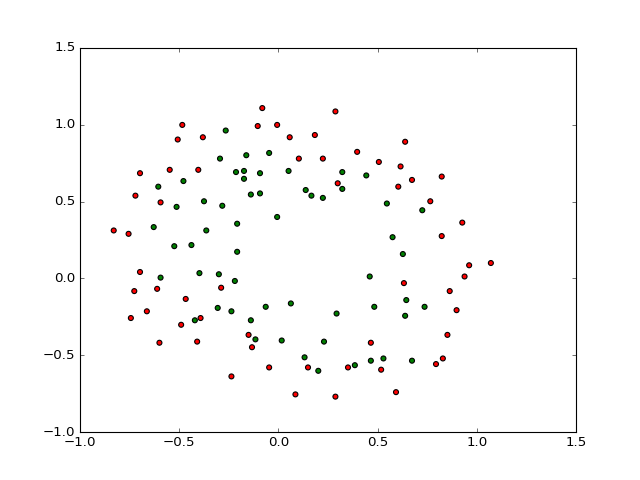

In [102]:
chips_scatter = plt.figure()
chips_scatter_ax = chips_scatter.add_subplot(111)

colors = ['red', 'green']

chips_scatter_ax.scatter(chips_features[1], chips_features[2], 
                        c = chips_labels, 
                        cmap = matplotlib.colors.ListedColormap(colors))

## 2.2 Feature mapping

In [129]:
def mapFeatures(x1, x2):
    """Given two vectors of feature values, returns a new matrix of
    polynomial features up to the sixth power, as such:
    [1, x1, x2, x1^2, x1x2, x2^2 ... x1^6, x2^6]"""
    
    features = np.ones_like(x1) # theta0, vector of ones
    
    for i in range(0, 7):
        for j in range(0, i):
            feat = x1**(i - j) * x2**j
            features = np.vstack((features, feat))
            
    return features

In [134]:
chips_features_extra = mapFeatures(chips_features[1], 
                                   chips_features[2])


In [ ]:
def computeCostReg(theta, X, y):
    """Computes cost function for regularized logistic regression.
    Regularizes all but the first feature (row of 1s)"""